# 6.05: Handling Categorical Data in Feature Engineering

## 1. What are categorical features?

- Data that can be categorized but lacks an inherent hierarchy or order is known as categorical data. In other words, there is no mathematical connection between the categories.
- If you try and train ML or most SKlearn models with categorical data, you’ll immediately get an error.
- Before categorical data can be utilized as input to a machine learning model, it must first be transformed into numerical data.
- This process of converting categorical data into numeric representation is known as encoding.
  
**Examples:**  
1. `Gender` → {Male, Female}  
2. `City` → {Delhi, Mumbai, Kolkata}  
3. `PropertyType` → {Apartment, House, Studio}

---

## 2. Two main types

1. **Nominal (unordered)** — no natural order.  
   - Example: `Color` = {Red, Blue, Green}  
2. **Ordinal (ordered)** — categories have a meaningful order but differences are not numeric.  
   - Example: `Satisfaction` = {Poor < Average < Good < Excellent}
   - `Levels of education` = {high school, bachelor's, master's}

---

In [86]:
import pandas as pd
import numpy as np

# matplotlib & seaborn
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
n = 50

df = pd.DataFrame({
    # Nominal
    'Gender': np.random.choice(['Male', 'Female', 'Other'], n),
    'Color': np.random.choice(['Red', 'Blue', 'Green', 'Yellow'], n),
    
    # Ordinal
    'Education': np.random.choice(['High School', 'Bachelors', 'Masters', 'PhD'], n),
    'Satisfaction': np.random.choice(['Low', 'Medium', 'High'], n),
    
    # Binary
    'HasCar': np.random.choice([0, 1], n),
    
    # High Cardinality
    'City': np.random.choice([f'City_{i}' for i in range(1, 11)], n)
})

df.head()

,Gender,Color,Education,Satisfaction,HasCar,City
0,Other,Blue,High School,Low,1,City_7
1,Male,Red,Bachelors,High,1,City_2
2,Other,Blue,Masters,Medium,1,City_3
3,Other,Red,High School,High,1,City_1
4,Male,Blue,PhD,High,1,City_5


## 3. How to tell if a column is categorical (step-by-step)

1. Inspect the data type (in pandas: `df[col].dtype`) — often `object` or `category`.  
2. Check unique value count: `df[col].nunique()`. Few unique values → likely categorical.  
3. Ask: _Are the values labels or measured quantities?_  
   - If labels/codes → categorical.  
   - If counts/measurements where arithmetic makes sense → numeric.

---

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Gender        50 non-null     object
 1   Color         50 non-null     object
 2   Education     50 non-null     object
 3   Satisfaction  50 non-null     object
 4   HasCar        50 non-null     int64 
 5   City          50 non-null     object
dtypes: int64(1), object(5)
memory usage: 2.5+ KB


In [88]:
df.nunique()

Gender           3
Color            4
Education        4
Satisfaction     3
HasCar           2
City            10
dtype: int64

## 4. EDA & visualization (quick steps)

1. Frequency table: `df[col].value_counts()`  
2. Relative frequency: `df[col].value_counts(normalize=True)`  
3. Bar plot: `df[col].value_counts().plot(kind='bar')`  
4. Cross-tab with target: `pd.crosstab(df[col], df['target'], normalize='index')`

---

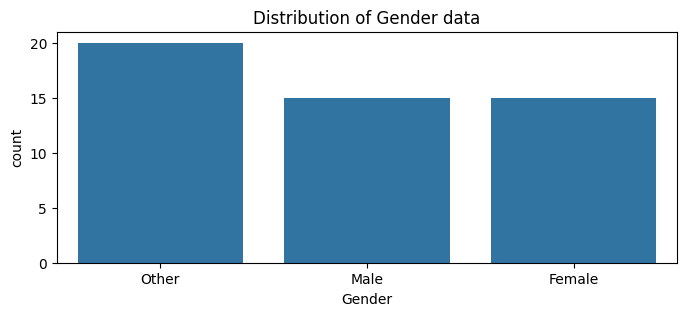

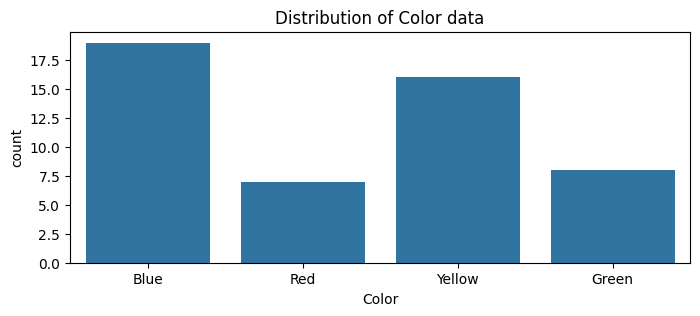

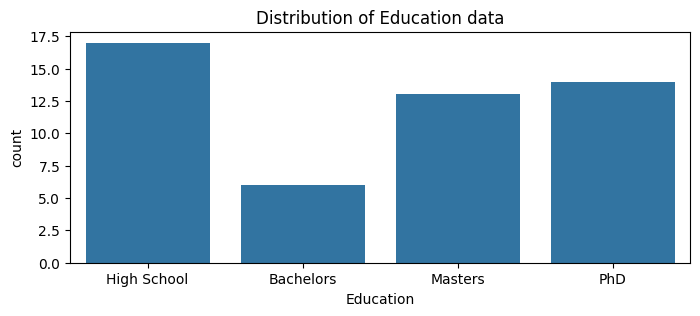

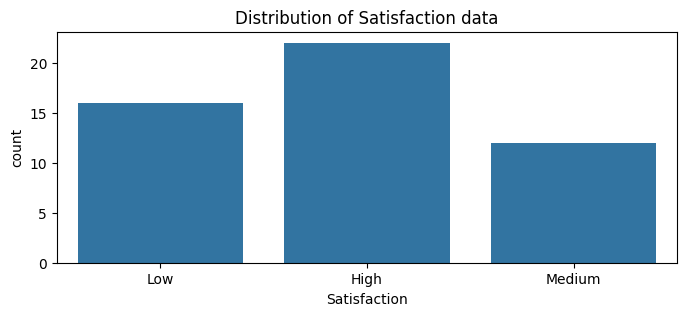

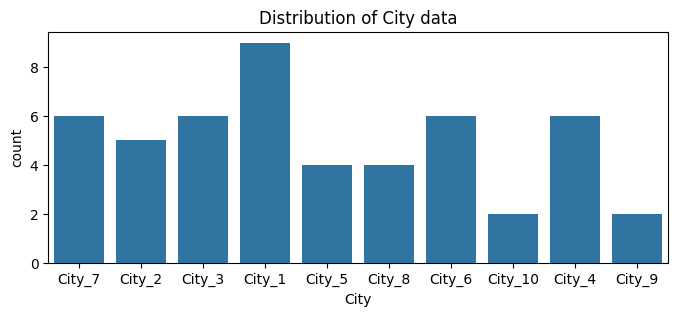

In [89]:
# Select categorical columns
cat_cols = df.select_dtypes(include='object').columns

for label in cat_cols: # plots graph for every categorial label
    plt.figure(figsize=(8, 3))
    sns.countplot(x=label, data=df) # plots a bar graph
    plt.title(f'Distribution of {label} data') # Title of the graph plotted
    plt.show()

## 5. Common encodings (how to convert to numbers for ML)

- **One-Hot Encoding** — binary column per category. Good for low-cardinality nominal features.
- **Label Encoding** — integer labels (be careful: introduces an order).  
- **Ordinal Encoding** — map categories to integers with a meaningful order.  
- **Frequency / Count Encoding** — replace category by its frequency/count.  
- **Target Encoding (mean encoding)** — replace category by mean(target) — risk of leakage; use CV.

In [90]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

In [91]:
print(cat_cols)

Index(['Gender', 'Color', 'Education', 'Satisfaction', 'City'], dtype='object')


In [92]:
# 'Gender', 'Color', 'City' => Nominal Data => One Hot Encoding
# 'Education', 'Satisfaction' => Ordinal Data => Ordinal Encoding
# Label Encoding Vs Ordinal Encoding 

**label Encoding**

In [93]:
le = LabelEncoder()
df['Education_label_encoded'] = le.fit_transform(df['Education'])
df['Satisfaction_label_encoded'] = le.fit_transform(df['Satisfaction'])

In [94]:
df.head()

,Gender,Color,Education,Satisfaction,HasCar,City,Education_label_encoded,Satisfaction_label_encoded
0,Other,Blue,High School,Low,1,City_7,1,1
1,Male,Red,Bachelors,High,1,City_2,0,0
2,Other,Blue,Masters,Medium,1,City_3,2,2
3,Other,Red,High School,High,1,City_1,1,0
4,Male,Blue,PhD,High,1,City_5,3,0


**Ordinal Encoding**

In [95]:
ordinal_cols = ['Education', 'Satisfaction']

# Define the order for ordinal features
education_order = ['High School', 'Bachelors', 'Masters', 'PhD']
satisfaction_order = ['Low', 'Medium', 'High']

ordinal_encoder = OrdinalEncoder(categories=[education_order, satisfaction_order])
ordinal_encoded = ordinal_encoder.fit_transform(df[ordinal_cols])
df_ordinal_encoded = pd.DataFrame(ordinal_encoded, columns=[f"{c}_encoded" for c in ordinal_cols])

In [96]:
df = pd.concat([df,df_ordinal_encoded], axis=1)
df

,Gender,Color,Education,Satisfaction,HasCar,City,Education_label_encoded,Satisfaction_label_encoded,Education_encoded,Satisfaction_encoded
0,Other,Blue,High School,Low,1,City_7,1,1,0.0,0.0
1,Male,Red,Bachelors,High,1,City_2,0,0,1.0,2.0
2,Other,Blue,Masters,Medium,1,City_3,2,2,2.0,1.0
3,Other,Red,High School,High,1,City_1,1,0,0.0,2.0
4,Male,Blue,PhD,High,1,City_5,3,0,3.0,2.0
5,Male,Yellow,Bachelors,Low,1,City_1,0,1,1.0,0.0
6,Other,Yellow,High School,High,1,City_8,1,0,0.0,2.0
7,Female,Green,PhD,Low,0,City_1,3,1,3.0,0.0
8,Other,Yellow,PhD,High,1,City_1,3,0,3.0,2.0
9,Other,Green,PhD,Medium,1,City_2,3,2,3.0,1.0


In [97]:
df.drop(['Education_label_encoded','Satisfaction_label_encoded'], axis=1, inplace=True)
df.head()

,Gender,Color,Education,Satisfaction,HasCar,City,Education_encoded,Satisfaction_encoded
0,Other,Blue,High School,Low,1,City_7,0.0,0.0
1,Male,Red,Bachelors,High,1,City_2,1.0,2.0
2,Other,Blue,Masters,Medium,1,City_3,2.0,1.0
3,Other,Red,High School,High,1,City_1,0.0,2.0
4,Male,Blue,PhD,High,1,City_5,3.0,2.0


In [98]:
df.drop(['Education','Satisfaction'], axis=1, inplace=True)
df.head()

,Gender,Color,HasCar,City,Education_encoded,Satisfaction_encoded
0,Other,Blue,1,City_7,0.0,0.0
1,Male,Red,1,City_2,1.0,2.0
2,Other,Blue,1,City_3,2.0,1.0
3,Other,Red,1,City_1,0.0,2.0
4,Male,Blue,1,City_5,3.0,2.0


**One-Hot Encoding (Low cardinality)**

In [99]:
nominal_cols = ['Gender', 'Color']
ohe_nominal = OneHotEncoder(drop='first', sparse_output=False)  # drop first to avoid dummy variable trap
nominal_encoded = ohe_nominal.fit_transform(df[nominal_cols])
df_nominal_encoded = pd.DataFrame(nominal_encoded, columns=ohe_nominal.get_feature_names_out(nominal_cols))

In [100]:
df_nominal_encoded.head()

,Gender_Male,Gender_Other,Color_Green,Color_Red,Color_Yellow
0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0


In [101]:
df = pd.concat([df,df_nominal_encoded], axis=1)
df.drop(['Gender','Color'], axis=1, inplace=True)

In [102]:
df.head()

,HasCar,City,Education_encoded,Satisfaction_encoded,Gender_Male,Gender_Other,Color_Green,Color_Red,Color_Yellow
0,1,City_7,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,City_2,1.0,2.0,1.0,0.0,0.0,1.0,0.0
2,1,City_3,2.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1,City_1,0.0,2.0,0.0,1.0,0.0,1.0,0.0
4,1,City_5,3.0,2.0,1.0,0.0,0.0,0.0,0.0


**One-Hot Encoding: Why Drop One Column?**
- One-hot encoding creates k columns for a categorical feature with k categories.
- But the last column is redundant, since it can be inferred from the others.
- Keeping all columns → causes multicollinearity in linear models (logistic/linear regression) not in tree based models.
- Dropping one column → removes redundancy (avoids the dummy variable trap).

**High cardinality Categorical Data**

- High cardinality refers to a large number of unique categories in a categorical feature. 
- Dealing with high cardinality is a common challenge in encoding categorical data for machine learning models. 
- High cardinality can lead to sparse data representation and can have a negative impact on the performance of some machine learning models. 

In [103]:
df['City'].value_counts()

City
City_1     9
City_7     6
City_4     6
City_3     6
City_6     6
City_2     5
City_8     4
City_5     4
City_10    2
City_9     2
Name: count, dtype: int64

- Solution 1: Grouping Rare Categories
- Solution 2:  Target Encoding - Target encoding replaces the categorical values with the mean target value of that category. It provides a more continuous representation of the categorical data and can help capture the relationship between the categorical feature and the target variable.

**One-Hot Encoding (High cardinality)**

In [104]:
high_card_cols = ['City']
ohe_highcard = OneHotEncoder(drop='first', sparse_output=False)
highcard_encoded = ohe_highcard.fit_transform(df[high_card_cols])
df_highcard_encoded = pd.DataFrame(highcard_encoded, columns=ohe_highcard.get_feature_names_out(high_card_cols))
print("High cardinality columns after OneHotEncoder:\n", df_highcard_encoded.head(), "\n")

High cardinality columns after OneHotEncoder:
    City_City_10  City_City_2  City_City_3  City_City_4  City_City_5  \
0           0.0          0.0          0.0          0.0          0.0   
1           0.0          1.0          0.0          0.0          0.0   
2           0.0          0.0          1.0          0.0          0.0   
3           0.0          0.0          0.0          0.0          0.0   
4           0.0          0.0          0.0          0.0          1.0   

   City_City_6  City_City_7  City_City_8  City_City_9  
0          0.0          1.0          0.0          0.0  
1          0.0          0.0          0.0          0.0  
2          0.0          0.0          0.0          0.0  
3          0.0          0.0          0.0          0.0  
4          0.0          0.0          0.0          0.0   



**Target Encoding (encoding based on target mean; useful in ML)**

In [105]:
# Assuming a target column for ML
df['Purchased'] = np.random.choice([0,1], n)

# Using mean target encoding
city_mean = df.groupby('City')['Purchased'].mean()
df['City_encoded'] = df['City'].map(city_mean)

In [106]:
df.head()

,HasCar,City,Education_encoded,Satisfaction_encoded,Gender_Male,Gender_Other,Color_Green,Color_Red,Color_Yellow,Purchased,City_encoded
0,1,City_7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0.500000
1,1,City_2,1.0,2.0,1.0,0.0,0.0,1.0,0.0,1,0.600000
2,1,City_3,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0.833333
3,1,City_1,0.0,2.0,0.0,1.0,0.0,1.0,0.0,0,0.444444
4,1,City_5,3.0,2.0,1.0,0.0,0.0,0.0,0.0,1,0.250000


In [107]:
df.drop(['City'], axis=1, inplace=True)
df.head()

,HasCar,Education_encoded,Satisfaction_encoded,Gender_Male,Gender_Other,Color_Green,Color_Red,Color_Yellow,Purchased,City_encoded
0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0.500000
1,1,1.0,2.0,1.0,0.0,0.0,1.0,0.0,1,0.600000
2,1,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0.833333
3,1,0.0,2.0,0.0,1.0,0.0,1.0,0.0,0,0.444444
4,1,3.0,2.0,1.0,0.0,0.0,0.0,0.0,1,0.250000


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HasCar                50 non-null     int64  
 1   Education_encoded     50 non-null     float64
 2   Satisfaction_encoded  50 non-null     float64
 3   Gender_Male           50 non-null     float64
 4   Gender_Other          50 non-null     float64
 5   Color_Green           50 non-null     float64
 6   Color_Red             50 non-null     float64
 7   Color_Yellow          50 non-null     float64
 8   Purchased             50 non-null     int64  
 9   City_encoded          50 non-null     float64
dtypes: float64(8), int64(2)
memory usage: 4.0 KB
